In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
    
num_fam = 10
start = 0

In [6]:
scenarios = ['IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO','MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K']

In [7]:
lower_bounds = {}
for s in scenarios:
    lower_bounds[s]=pd.read_csv('../data/lower_bounds.csv')[s].iloc[0]

(188, 119)


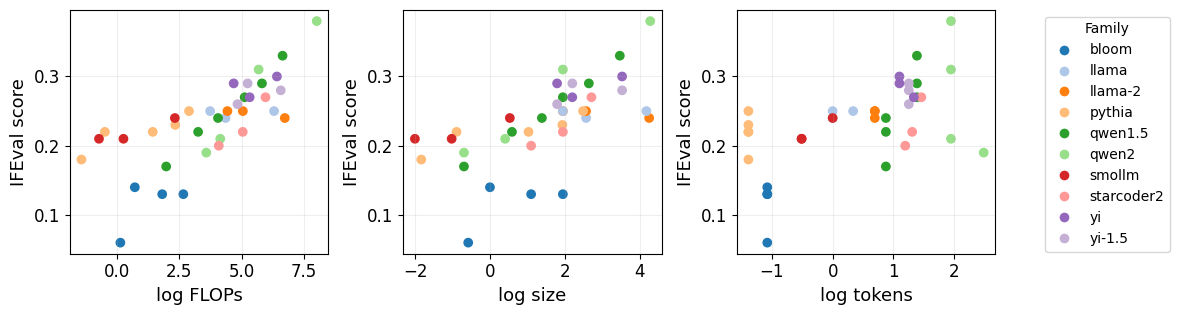

(188, 119)


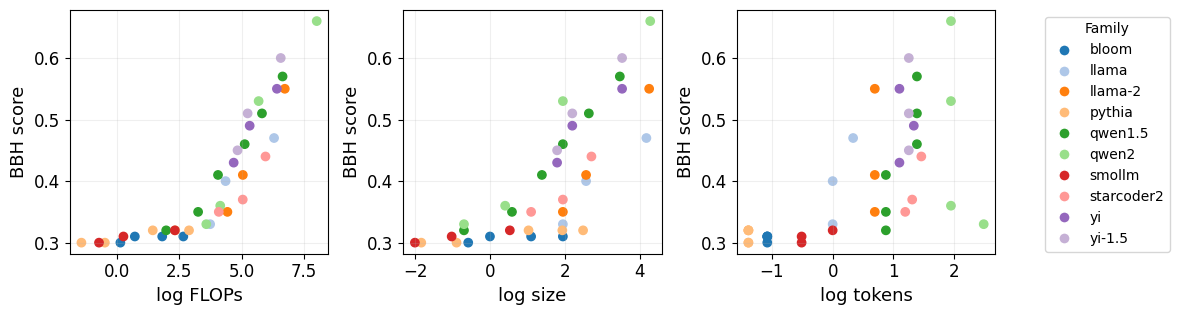

(188, 119)


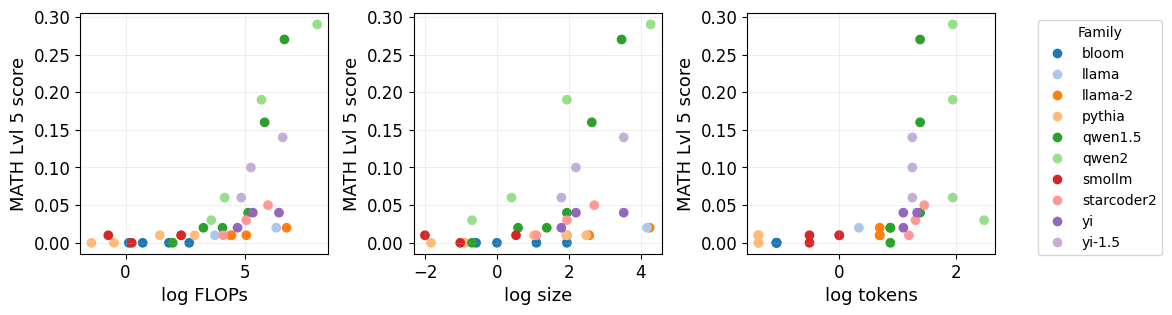

(188, 119)


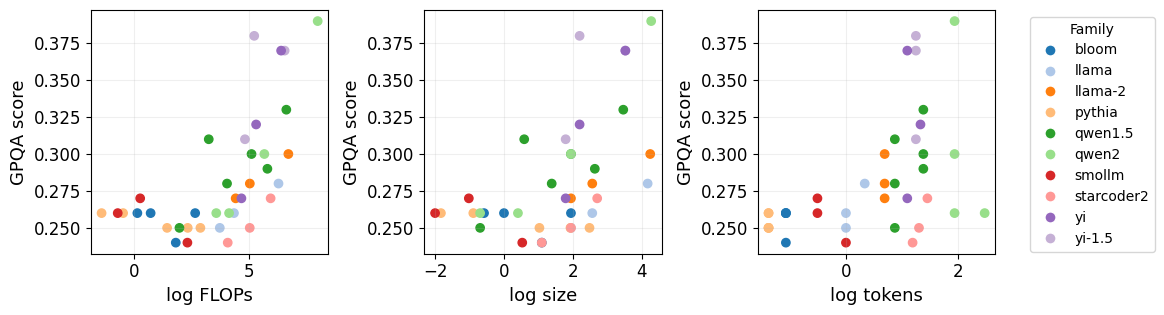

(188, 119)


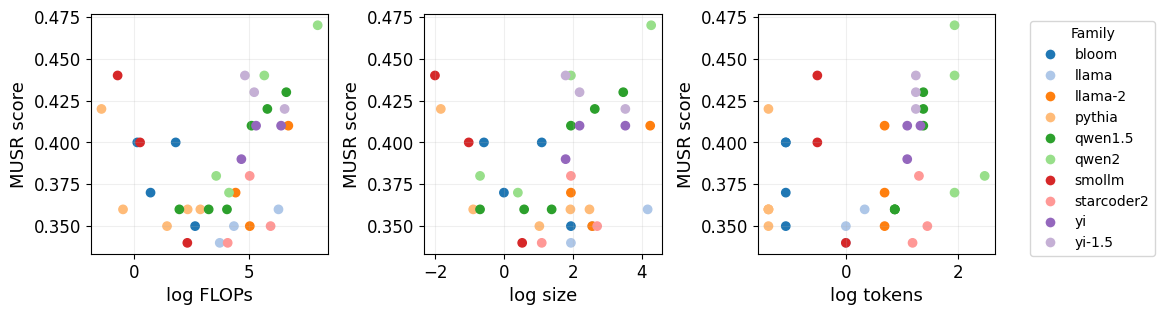

(188, 119)


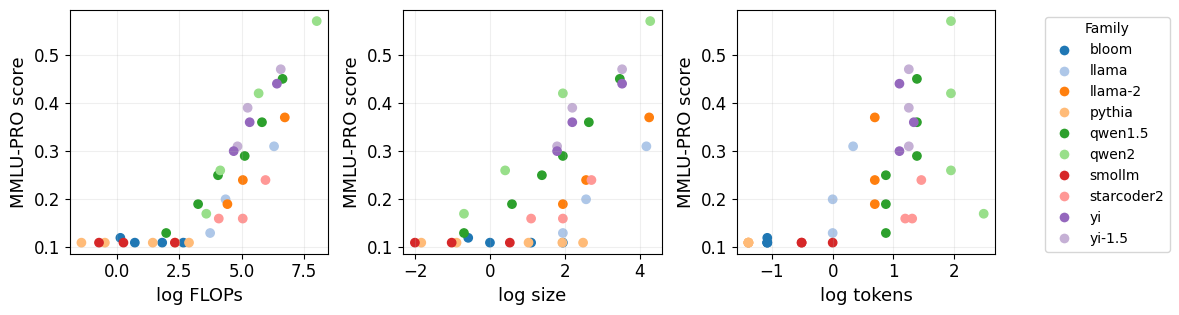

(188, 119)


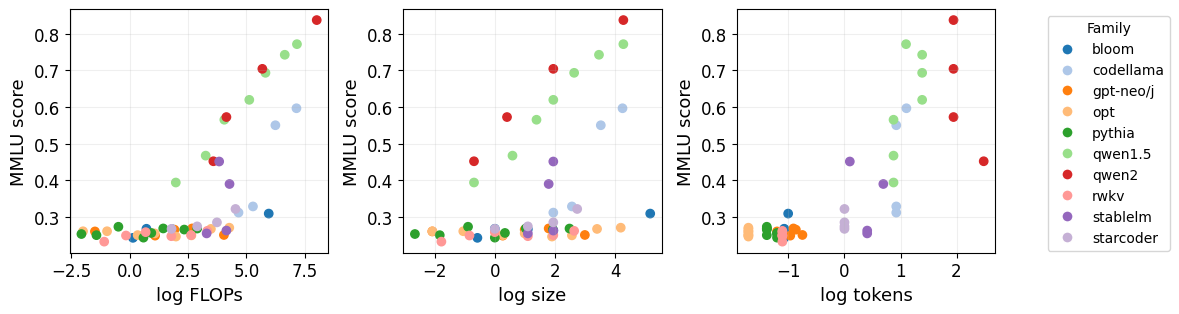

(188, 119)


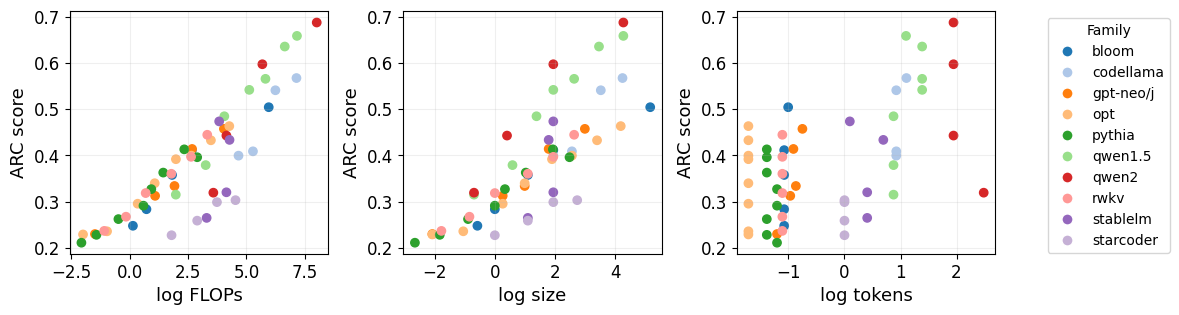

(188, 119)


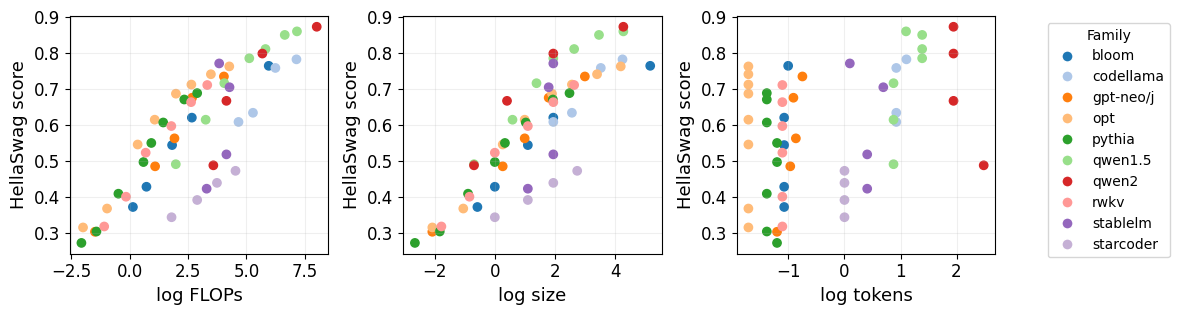

(188, 119)


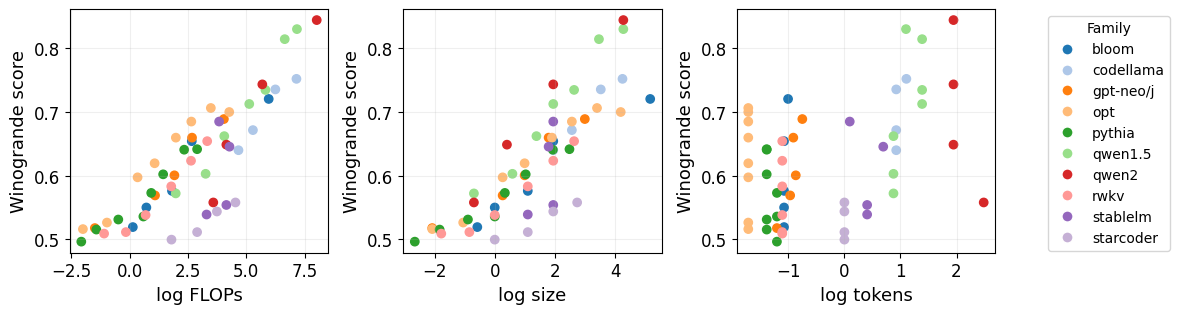

(188, 119)


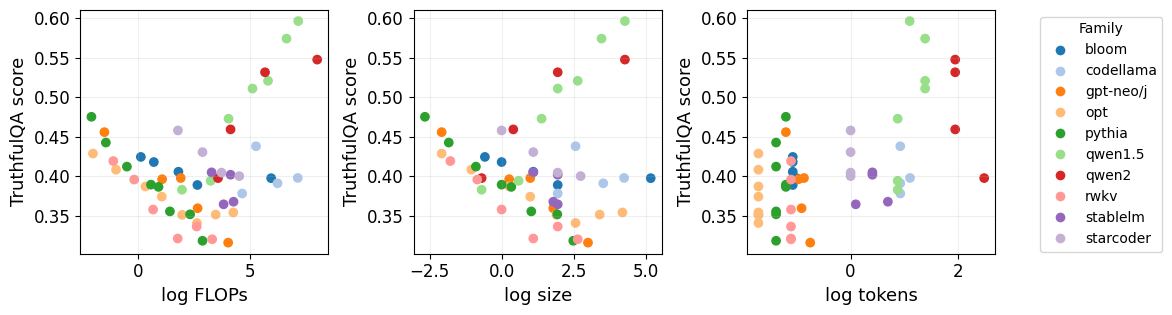

(188, 119)


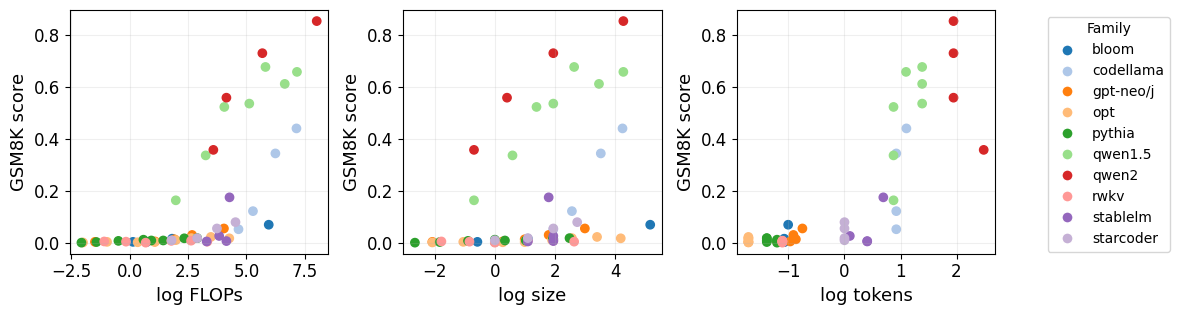

In [8]:
for scenario in scenarios:
    data = pd.read_csv('../data/data_v2.csv')
    print(data.shape)
    data['logS'] = np.log(data['#Params (B)'])
    data['logT'] = np.log(data['Pretraining Data Size (T)'])
    data['logF'] = np.log(data['FLOPs (1E21)'])
    data = data.loc[~data.Instruct,['Model','Family','Instruct','logS','logT','logF']+[scenario]]
    data = data.dropna()
    #print(data.Family.value_counts().iloc[start:start+num_fam])
    selected_families = list(data.Family.value_counts().iloc[start:start+num_fam].index)
    data = data.loc[[m in selected_families for m in data.Family]]
    #print(data.shape)

    y = np.array(data[scenario])
    logS = np.array(data['logS'])
    logT = np.array(data['logT'])
    logF = np.array(data['logF'])
    Fam = np.array(data.Family)
    unique_categories = np.unique(Fam)
    color_map = {category: color for category, color in zip(unique_categories, plt.cm.tab20.colors)}
    colors = [color_map[category] for category in Fam]
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 3.25))
    
    # First plot
    sc1 = axs[0].scatter(logF, y, c=colors)
    axs[0].set_xlabel('log FLOPs', size=13)
    axs[0].set_ylabel(f'{scenario} score', size=13)
    
    # Second plot
    sc2 = axs[1].scatter(logS, y, c=colors)
    axs[1].set_xlabel('log size', size=13)
    axs[1].set_ylabel(f'{scenario} score', size=13)
    
    # Third plot
    sc3 = axs[2].scatter(logT, y, c=colors)
    axs[2].set_xlabel('log tokens', size=13)
    axs[2].set_ylabel(f'{scenario} score', size=13)
    
    # Adding a legend for the family colors
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[fam], markersize=8, label=f'{fam}')
               for fam in unique_categories]
    axs[2].legend(handles=handles, title='Family', loc='upper right', bbox_to_anchor=(1.7, 1))
    
    # Set other properties
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust 'labelsize' as needed
        ax.grid(alpha=.2)
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(f'../plots/{scenario}.png')
    plt.show()
